In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load the dataset
df = pd.read_csv("/kaggle/input/dummy-truck-sales-for-time-series/Truck_sales.csv")

# Display the first few rows of the dataset
df.head()


,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Drop any rows with missing values
df_cleaned = df.dropna()

# Display information about the cleaned dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**Overview of Monthly Truck Sales**

In [3]:
# Create a line plot for monthly truck sales
fig1 = px.line(df_cleaned, x='Month-Year', y='Number_Trucks_Sold', title='Monthly Truck Sales')
fig1.show()


**Distribution of Truck Sales**

In [4]:
# Create a histogram for the distribution of truck sales
fig2 = px.histogram(df_cleaned, x='Number_Trucks_Sold', title='Distribution of Truck Sales')
fig2.show()


**What is the Trend in Monthly Truck Sales Over the Year?**

In [5]:
# Create a trend line for monthly truck sales
fig4 = px.line(df_cleaned, x='Month-Year', y='Number_Trucks_Sold',
               title='Trend in Monthly Truck Sales Over the Year')
fig4.update_traces(mode='lines+markers')
fig4.show()


**Are There Any Outliers in the Truck Sales Data?**

In [6]:
# Create a box plot to identify outliers in truck sales
fig5 = px.box(df_cleaned, y='Number_Trucks_Sold', title='Identification of Outliers in Truck Sales')
fig5.show()


**What is the Cumulative Truck Sales Trend Over Time?**

In [7]:
# Calculate cumulative truck sales over time
df_cleaned['Cumulative_Sales'] = df_cleaned['Number_Trucks_Sold'].cumsum()

# Create a line chart for cumulative truck sales
fig8 = px.line(df_cleaned, x='Month-Year', y='Cumulative_Sales',
               title='Cumulative Truck Sales Trend Over Time')
fig8.update_traces(mode='lines+markers')
fig8.show()


**Are There Any Correlations Between Monthly Truck Sales and Previous Months?**

In [8]:
# Calculate lagged values to explore correlations
df_cleaned['Previous_Month_Sales'] = df_cleaned['Number_Trucks_Sold'].shift(1)

# Create a scatter plot to explore correlations
fig10 = px.scatter(df_cleaned, x='Previous_Month_Sales', y='Number_Trucks_Sold',
                   title='Correlation Between Monthly Truck Sales and Previous Months')
fig10.update_traces(marker=dict(size=8, opacity=0.8))
fig10.show()


**What is the Monthly Sales Trend Compared to the Overall Average?**

In [9]:
# Calculate the overall average monthly truck sales
overall_avg = df_cleaned['Number_Trucks_Sold'].mean()

# Create a line plot to compare the monthly sales trend to the overall average
fig18 = px.line(df_cleaned.reset_index(), x='Month-Year', y='Number_Trucks_Sold',
                title='Monthly Truck Sales Trend Compared to Overall Average')
fig18.add_hline(y=overall_avg, line_dash="dash", annotation_text=f'Overall Average: {overall_avg:.2f}',
                annotation_position="bottom right", line_color="red")
fig18.show()


**What is the Rolling Average of Monthly Truck Sales?**

In [10]:
# Calculate the rolling average of monthly truck sales
df_cleaned['Rolling_Avg'] = df_cleaned['Number_Trucks_Sold'].rolling(window=3).mean()

# Create a line plot to visualize the rolling average of monthly truck sales
fig20 = px.line(df_cleaned.reset_index(), x='Month-Year', y=['Number_Trucks_Sold', 'Rolling_Avg'],
                title='Monthly Truck Sales and Rolling Average')
fig20.show()


**Visualizing Monthly Sales Distribution and Central Tendency**

In [11]:
# Create a violin plot to visualize the distribution of monthly truck sales
fig_dist = px.violin(df_cleaned, y='Number_Trucks_Sold', box=True,
                     title='Distribution of Monthly Truck Sales and Central Tendency')
fig_dist.update_yaxes(title_text='Number of Trucks Sold')
fig_dist.show()


**Analyzing Monthly Sales Trends with Rolling Statistics**

In [12]:
# Calculate the rolling mean and rolling standard deviation
df_cleaned['Rolling_Mean'] = df_cleaned['Number_Trucks_Sold'].rolling(window=3).mean()
df_cleaned['Rolling_Std'] = df_cleaned['Number_Trucks_Sold'].rolling(window=3).std()

# Create a line plot to visualize monthly sales trends along with rolling mean and rolling standard deviation
fig_rolling_stats = px.line(df_cleaned.reset_index(), x='Month-Year',
                            y=['Number_Trucks_Sold', 'Rolling_Mean', 'Rolling_Std'],
                            title='Monthly Truck Sales Trends with Rolling Statistics')
fig_rolling_stats.show()


**Analyzing Monthly Sales Trends with Exponential Moving Average (EMA)**

In [13]:
# Calculate the exponential moving average (EMA)
df_cleaned['EMA'] = df_cleaned['Number_Trucks_Sold'].ewm(span=3, adjust=False).mean()

# Create a line plot to visualize monthly sales trends along with EMA
fig_ema = px.line(df_cleaned.reset_index(), x='Month-Year',
                  y=['Number_Trucks_Sold', 'EMA'],
                  title='Monthly Truck Sales Trends with Exponential Moving Average (EMA)')
fig_ema.show()


**Analyzing Autocorrelation Function (ACF)**

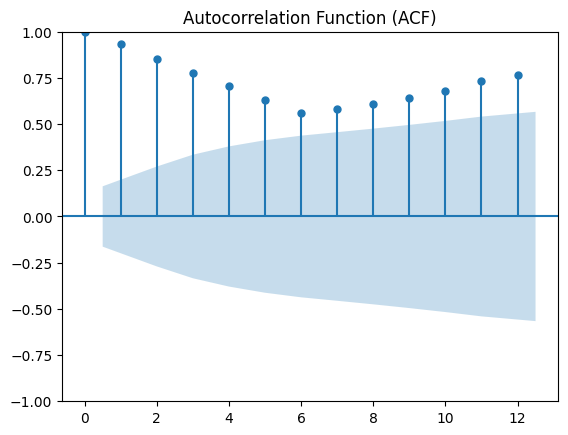

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Plot the Autocorrelation Function (ACF)
plot_acf(df_cleaned['Number_Trucks_Sold'], lags=12, title='Autocorrelation Function (ACF)')
plt.show()


**Analyzing Partial Autocorrelation Function (PACF)**

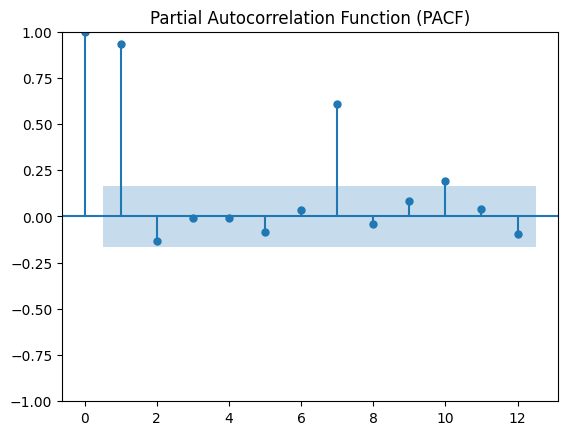

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(df_cleaned['Number_Trucks_Sold'], lags=12, title='Partial Autocorrelation Function (PACF)')
plt.show()


**Decomposing Seasonal and Trend Components with STL Decomposition**

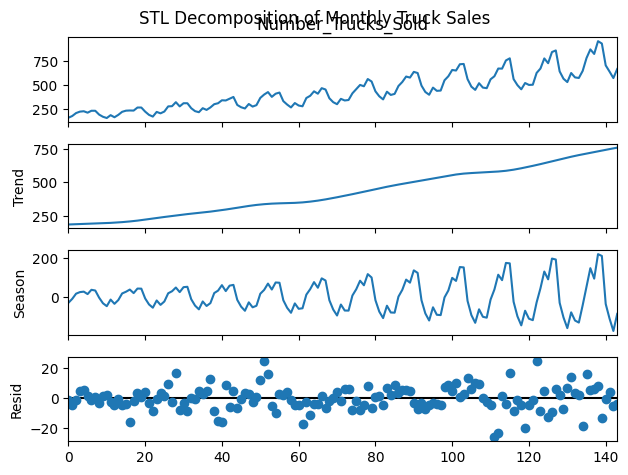

In [16]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl_result = STL(df_cleaned['Number_Trucks_Sold'], period=12).fit()

# Plot the original time series along with decomposed components
fig_stl = stl_result.plot()
fig_stl.suptitle('STL Decomposition of Monthly Truck Sales')
plt.show()
